# Project: Investigate a Dataset - [Flight Delay]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is a competiation on keggle for explorler and predicete flight delay in this [link](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

During the EDA, I intended to create good quality figures from which the information would be easily accessible at a first glance. An important aspect of the data scientist job consists in divulgating its findings to people who do not necessarily have knowledge in the technical aspects data scientists master. Graphics are surely the most powerful tool to achieve that goal, and mastering visualization techniques thus seems important.


### Project Overview 

Each entry of the `flights.csv` file corresponds to a flight and we see that more than 5'800'000 flights have been recorded in 2015. These flights are described according to 31 variables. A description of these variables can be found [here](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time) and I briefly recall the meaning of the variables that will be used in this notebook:

- **YEAR, MONTH, DAY, DAY_OF_WEEK**: dates of the flight <br/>
- **AIRLINE**: An identification number assigned by US DOT to identify a unique airline <br/>
- **ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**: code attributed by IATA to identify the airports <br/>
- **SCHEDULED_DEPARTURE** and **SCHEDULED_ARRIVAL** : scheduled times of take-off and landing <br/> 
- **DEPARTURE_TIME** and **ARRIVAL_TIME**: real times at which take-off and landing took place <br/> 
- **DEPARTURE_DELAY** and **ARRIVAL_DELAY**: difference (in minutes) between planned and real times <br/> 
- **DISTANCE**: distance (in miles)  <br/>

An additional file of this dataset, the `airports.csv` file, gives a more exhaustive description of the airports, and `airlines.csv` file gives the airlines names

### Data Dictionary

3 Datasets<br/>
**'Flights Dataset'**<br/>
The data is contained on 34 columns about flight trip in USA airport in 2015.<br/>

**'Airlines Dataset'**<br/>
The data is contained on 2 columns about name of airlines and it's code.<br/>

**'Airports Dataset'**<br/>
The data is contained on 7 columns about name of airports and it's code and location information.<br/>

### The Quetions i will be answer for analyse the data set

>from tableau project<br/>
><br/>Q1: The 5 Worst Airline in terms of flight delays
><br/>Q2: The 10 Airports eith the most delays in DEPARTURE
><br/>Q3: The 10 Airports eith the most delays in ARRIVAL
><br/>Q4: The 5 Worst Airline in terms of Cancelled trips
><br/>Q5: Number of Cancelled trips by Month

<a id='wrangling'></a>
## Data Wrangling

> In this section I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [1]:
# Import necessary package

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
# Import Tableau Visualisation 
from IPython.display import IFrame

%matplotlib inline

In [2]:
# Import datasets

airlines_df = pd.read_csv("airlines.csv")
airports_df = pd.read_csv("airports.csv")
flights_df = pd.read_csv("flights.csv")

In [3]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
flights_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,363169,5290975,2015,11,28,6,DL,1590,N971AT,...,756.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,704061,4899614,2015,11,2,1,AA,2516,N3CVAA,...,1940.0,41.0,0,0,NaN,13.0,0.0,28.0,0.0,0.0
2,2,389056,3769408,2015,8,22,6,AS,93,N317AS,...,1619.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,132167,4999624,2015,11,9,1,AA,2383,N871AA,...,844.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,304371,2572568,2015,6,12,5,US,1978,N833AW,...,832.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



### Data Cleaning

>#### Clean Process
>1-	Merge dataframe flights with each airline & airports \
>2-	I have some column need to drop them.\
>3- I have some column need to rename.\
>4- I will add new column to determaine total delay.

In [6]:
#1-Merge dataframe flights with each airline & airports

df_1 = flights_df.merge(airlines_df,left_on='AIRLINE',right_on='IATA_CODE', how='left')
df_1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,0,363169,5290975,2015,11,28,6,DL,1590,N971AT,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,DL,Delta Air Lines Inc.
1,1,704061,4899614,2015,11,2,1,AA,2516,N3CVAA,...,0,0,NaN,13.0,0.0,28.0,0.0,0.0,AA,American Airlines Inc.
2,2,389056,3769408,2015,8,22,6,AS,93,N317AS,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
3,3,132167,4999624,2015,11,9,1,AA,2383,N871AA,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,4,304371,2572568,2015,6,12,5,US,1978,N833AW,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.


In [7]:
#1-Merge dataframe flights with each airline & airports

df_2 = df_1.merge(airports_df,left_on='ORIGIN_AIRPORT',right_on='IATA_CODE', how='left')
df_2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,...,WEATHER_DELAY,IATA_CODE_x,AIRLINE_y,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,0,363169,5290975,2015,11,28,6,DL,1590,N971AT,...,NaN,DL,Delta Air Lines Inc.,CAE,Columbia Metropolitan Airport,Columbia,SC,USA,33.93884,-81.11954
1,1,704061,4899614,2015,11,2,1,AA,2516,N3CVAA,...,0.0,AA,American Airlines Inc.,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
2,2,389056,3769408,2015,8,22,6,AS,93,N317AS,...,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,3,132167,4999624,2015,11,9,1,AA,2383,N871AA,...,NaN,AA,American Airlines Inc.,MCO,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
4,4,304371,2572568,2015,6,12,5,US,1978,N833AW,...,NaN,US,US Airways Inc.,CLE,Cleveland Hopkins International Airport,Cleveland,OH,USA,41.41089,-81.84940


In [8]:
#1-Merge dataframe flights with each airline & airports

df = df_2.merge(airports_df,left_on='DESTINATION_AIRPORT',right_on='IATA_CODE', how='left')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,...,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE,AIRPORT_y,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,0,363169,5290975,2015,11,28,6,DL,1590,N971AT,...,USA,33.93884,-81.11954,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
1,1,704061,4899614,2015,11,2,1,AA,2516,N3CVAA,...,USA,41.97960,-87.90446,DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
2,2,389056,3769408,2015,8,22,6,AS,93,N317AS,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
3,3,132167,4999624,2015,11,9,1,AA,2383,N871AA,...,USA,28.42889,-81.31603,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
4,4,304371,2572568,2015,6,12,5,US,1978,N833AW,...,USA,41.41089,-81.84940,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313


In [9]:
# 2- I have some column need to drop them.

columns_to_delete = ['Unnamed: 0', 'Unnamed: 0.1','AIRLINE_x', 'Unnamed: 0.1.1', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
                     'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','IATA_CODE_x','IATA_CODE_y','IATA_CODE','YEAR', 'DAY','DAY_OF_WEEK',
                     'SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME',
                     'AIR_TIME', 'DISTANCE', 'WHEELS_ON','TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','DIVERTED']
df.drop( columns = columns_to_delete , axis = 1 , inplace = True)

In [10]:
#3- I have some column need to rename.

Columns_to_rename = ['AIRLINE_y','AIRPORT_x','CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
                     'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y','LATITUDE_y', 'LONGITUDE_y']
Columns_new_name = ['AIRLINE','AIRPORT_ORIGIN','CITY_ORIGIN', 'STATE_ORIGIN', 'COUNTRY_ORIGIN', 'LATITUDE_ORIGIN',
                    'LONGITUDE_ORIGIN','AIRPORT_DESTINATION', 'CITY_DESTINATION', 'STATE_DESTINATION', 'COUNTRY_DESTINATION',
                    'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION']
for col in range(len(Columns_to_rename)):
    df.rename(columns = {Columns_to_rename[col]: Columns_new_name[col]}, inplace = True)

In [11]:
df.columns

Index(['MONTH', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE',
       'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN', 'COUNTRY_ORIGIN',
       'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION',
       'CITY_DESTINATION', 'STATE_DESTINATION', 'COUNTRY_DESTINATION',
       'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION'],
      dtype='object')

In [12]:
#4- I will add new column to determaine total delay.

df['total_delay'] = df['DEPARTURE_DELAY'] + df['AIR_SYSTEM_DELAY'] + df['SECURITY_DELAY'] + df['AIRLINE_DELAY'] + df['LATE_AIRCRAFT_DELAY']+df['WEATHER_DELAY']

In [13]:
df.to_csv('flights_aftr_merge.csv',index = False)

In [14]:
df = pd.read_csv('flights_aftr_merge.csv')

In [15]:
#Check dataset for:-
#1- How many column --- 39
#2- How many samples --- 274964
df.shape
print('Number of columns is {}'.format(df.shape[1]))
print('Number of Rows is {}'.format(df.shape[0]))


Number of columns is 24
Number of Rows is 274964


In [16]:
#3- Whats is datatype in each column
#4- null values
#5- % null values
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'Column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null Values(n/p)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'Null Values(%)'}))

print(pd.DataFrame(tab_info))

                  MONTH DEPARTURE_DELAY ARRIVAL_DELAY CANCELLED  \
Column type       int64         float64       float64     int64   
Null Values(n/p)      0            4245          5191         0   
Null Values(%)      0.0        1.543838      1.887884       0.0   

                 CANCELLATION_REASON AIR_SYSTEM_DELAY SECURITY_DELAY  \
Column type                   object          float64        float64   
Null Values(n/p)              270531           223101         223101   
Null Values(%)             98.387789        81.138258      81.138258   

                 AIRLINE_DELAY LATE_AIRCRAFT_DELAY WEATHER_DELAY  ...  \
Column type            float64             float64       float64  ...   
Null Values(n/p)        223101              223101        223101  ...   
Null Values(%)       81.138258           81.138258     81.138258  ...   

                 COUNTRY_ORIGIN LATITUDE_ORIGIN LONGITUDE_ORIGIN  \
Column type              object         float64          float64   
Null Values(n

In [17]:
# if thay any duplicated value --- yes because i drop columns
df.duplicated().sum()

2315

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:- **The 5 Worst Airline in terms of flight delays**

In [18]:
Q1 = df.groupby('AIRLINE')['total_delay'].count().nlargest(5)
Q1

AIRLINE
Southwest Airlines Co.         11660
American Airlines Inc.          6239
Delta Air Lines Inc.            5784
Atlantic Southeast Airlines     5257
Skywest Airlines Inc.           5226
Name: total_delay, dtype: int64

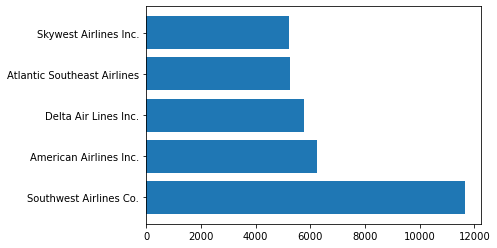

In [19]:
x = Q1.values
y = Q1.index
plt.barh(y,x,align = 'center');

### Research Question 2:- **The 10 Airports eith the most delays in DEPARTURE**

In [91]:
Q2 = df.groupby('AIRPORT_ORIGIN')['DEPARTURE_DELAY'].count().nlargest(10)
Q2

AIRPORT_ORIGIN
Hartsfield-Jackson Atlanta International Airport    17925
Chicago O'Hare International Airport                14297
Dallas/Fort Worth International Airport             11987
Denver International Airport                        10016
Los Angeles International Airport                    9934
Phoenix Sky Harbor International Airport             7603
San Francisco International Airport                  7546
George Bush Intercontinental Airport                 7386
McCarran International Airport                       6839
Minneapolis-Saint Paul International Airport         5796
Name: DEPARTURE_DELAY, dtype: int64

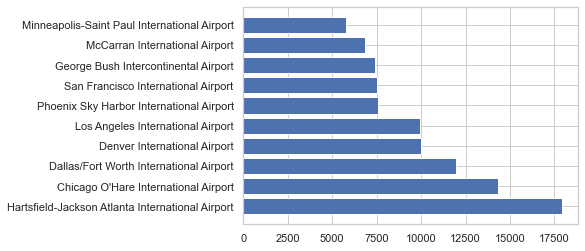

In [92]:
x = Q2.values
y = Q2.index
plt.barh(y,x,align = 'center');

### Research Question 3:- **The 10 Airports eith the most delays in ARRIVAL**

In [94]:
Q3 = df.groupby('AIRPORT_DESTINATION')['ARRIVAL_DELAY'].count().nlargest(10)
Q3

AIRPORT_DESTINATION
Hartsfield-Jackson Atlanta International Airport    17641
Chicago O'Hare International Airport                14300
Dallas/Fort Worth International Airport             11933
Los Angeles International Airport                    9990
Denver International Airport                         9936
San Francisco International Airport                  7453
Phoenix Sky Harbor International Airport             7431
George Bush Intercontinental Airport                 7404
McCarran International Airport                       6806
Orlando International Airport                        5801
Name: ARRIVAL_DELAY, dtype: int64

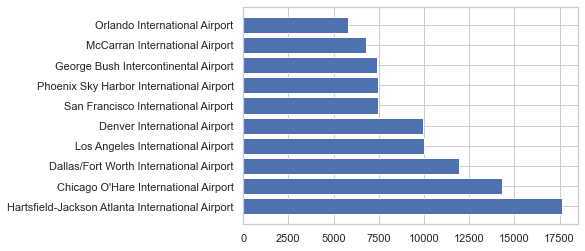

In [95]:
x = Q3.values
y = Q3.index
plt.barh(y,x,align = 'center');

### Research Question 4:- **The 5 Worst Airline in terms of Cancelled trips**

In [97]:
Q4 = df.groupby('AIRLINE')['CANCELLED'].count().nlargest(5)
Q4

AIRLINE
Southwest Airlines Co.         59437
Delta Air Lines Inc.           41516
American Airlines Inc.         33368
Skywest Airlines Inc.          27756
Atlantic Southeast Airlines    27172
Name: CANCELLED, dtype: int64

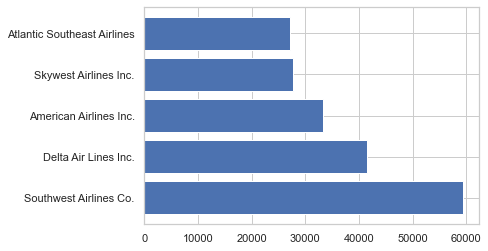

In [98]:
x = Q4.values
y = Q4.index
plt.barh(y,x,align = 'center');

### Research Question 5:- **Number of Cancelled trips by Month**

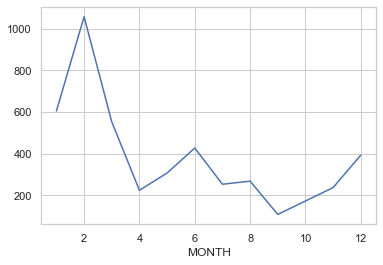

In [100]:
Q5 = df.groupby('MONTH')['CANCELLED'].sum()
Q5.plot();

## Tableau Project

In [23]:
%%HTML
<div class='tableauPlaceholder' id='viz1651075585577' style='position: relative'><noscript><a href='#'><img alt='Delay Story ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fl&#47;FlightDelayDashboard_16490201508310&#47;DelayStory&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FlightDelayDashboard_16490201508310&#47;DelayStory' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fl&#47;FlightDelayDashboard_16490201508310&#47;DelayStory&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1651075585577');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## If you like this kernel greatly appreciate to UPVOTE.Thank you. 